In [2]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
cdc_diabetes_health_indicators.variables


,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


In [5]:
data = cdc_diabetes_health_indicators.data.original.drop("ID", axis=1)
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [6]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
from sklearn import model_selection

train, test = model_selection.train_test_split(data, test_size=0.2)

train.shape[0], test.shape[0]

(202944, 50736)

In [8]:
target = "Diabetes_binary"
feats = data.drop(target, axis=1).columns

train_feats = train[feats]
train_target = train[[target]]

test_feats = test[feats]
test_target = test[[target]]

train_feats.shape, train_target.shape
test_feats.shape, test_target.shape,

((202944, 21), (202944, 1))

((50736, 21), (50736, 1))

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=len(feats) + 1)
dt.fit(train_feats, train_target);

In [10]:
import pandas as pd

results = pd.DataFrame({
    "Predictions": dt.predict(test_feats),
    "Target": test_target[target].to_numpy()
})

results.head()


,Predictions,Target
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(test_target, results["Predictions"]) * 100

81.10611794386628

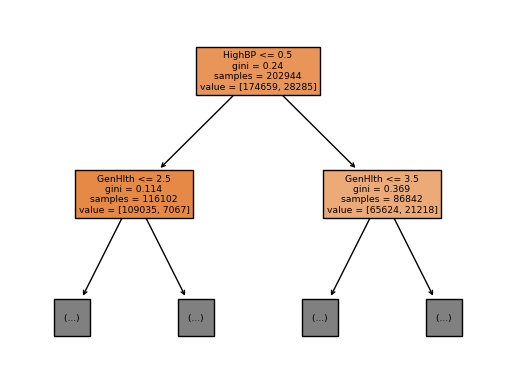

In [16]:
from sklearn import tree

tree.plot_tree(dt, feature_names=feats, filled=True, max_depth=1);